In [1]:
# Implement multilayer perceptron algorithm for MNIST Hand-Written Digit Classification.

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8689 - loss: 0.4555 - val_accuracy: 0.9663 - val_loss: 0.1128
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9645 - loss: 0.1173 - val_accuracy: 0.9775 - val_loss: 0.0831
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9786 - loss: 0.0713 - val_accuracy: 0.9762 - val_loss: 0.0797
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9838 - loss: 0.0517 - val_accuracy: 0.9792 - val_loss: 0.0756
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9881 - loss: 0.0405 - val_accuracy: 0.9768 - val_loss: 0.0764
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9905 - loss: 0.0290 - val_accuracy: 0.9755 - val_loss: 0.0880
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9920 - loss: 0.0249 - val_accuracy: 0.9795 - val_loss: 0.0837
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9931 - loss: 0.0205 -

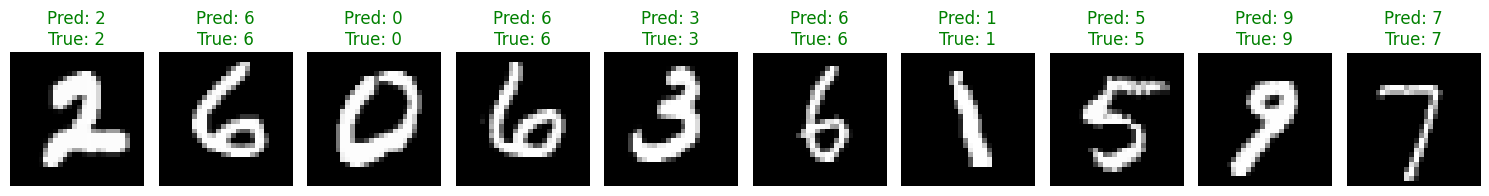

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

num_images = 10
indices = np.random.choice(len(x_test), num_images, replace=False)

predictions = model.predict(x_test)

plt.figure(figsize=(15, 4))

for i, idx in enumerate(indices):
    plt.subplot(1, num_images, i + 1)

    plt.imshow(x_test[idx], cmap='gray')
    plt.axis('off')

    predicted_label = np.argmax(predictions[idx])
    true_label = np.argmax(y_test[idx])

    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)

plt.tight_layout()
plt.show()
